In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from rdkit import Chem
from openbabel import pybel
from collections import defaultdict
from tqdm import tqdm
import os
import matplotlib
import matplotlib.pylab as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import random
import torch
from torch_geometric.data import Data
import numpy as np
import pickle

In [3]:
import sys
sys.path.append('../evaluation/')

In [4]:
from utils_eval import build_pdb_dict, group_by, extract_selected_pp, compute_target, process_one
from data_processing.ligand import Ligand
from data_processing.utils import sample_probability
from data_processing.utils import ATOM_TYPE_MAPPING, PP_TYPE_MAPPING, ATOM_FAMILIES, MAP_ATOM_TYPE_AROMATIC_TO_INDEX
from data_processing.paired_data import CombinedSparseGraphDataset

In [5]:
import py3Dmol
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG, Image
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.ipython_useSVG = True
IPythonConsole.molSize = 600, 600

In [6]:
raw_data_path = '../../data/cleaned_crossdocked_data/raw'

pdb_dict, pdb_rev_dict = build_pdb_dict(raw_data_path)

In [29]:
# ligand_filename = '1ywn_A_rec_1ywn_lif_lig_tt_docked_0.sdf'
# ligand_filename = '4b81_B_rec_4ara_c56_lig_tt_min_0.sdf'
# ligand_filename = '3fu5_A_rec_5ni6_dj3_lig_tt_min_0.sdf'
# ligand_filename = '1lhu_A_rec_1lhn_aon_lig_tt_min_0.sdf'
# ligand_filename = '5hbh_A_rec_5idn_6a7_lig_tt_min_0.sdf'
# ligand_filename = '4b84_A_rec_4b84_z5k_lig_tt_min_0.sdf'
# ligand_filename = '4yyz_B_rec_3ey4_352_lig_tt_docked_12.sdf'
# ligand_filename = '5aen_A_rec_5ni2_dj3_lig_tt_min_0.sdf'
# ligand_filename = '3d3e_B_rec_4ijw_1eq_lig_tt_min_0.sdf'
# ligand_filename = '3ey4_C_rec_4k1l_sff_lig_tt_min_0.sdf'
# ligand_filename = '4h7c_A_rec_3r58_nps_lig_tt_min_0.sdf'

# ligand_filename = '3hfg_A_rec_3hfg_17r_lig_tt_min_0.sdf'
# ligand_filename = '3ey4_C_rec_5pgu_8k4_lig_tt_min_0.sdf'
# ligand_filename = '5ni2_A_rec_5aen_dp8_lig_tt_min_0.sdf'
# ligand_filename = '3fu5_A_rec_5ni6_dj3_lig_tt_min_0.sdf'
# ligand_filename = '4yyz_B_rec_2ilt_nn1_lig_tt_min_0.sdf'
# ligand_filename = '4bnn_A_rec_4bnm_tcu_lig_tt_min_0.sdf'
# ligand_filename = '4yvx_A_rec_1s2a_imn_lig_tt_min_0.sdf'
# ligand_filename = '3czr_B_rec_4bb5_hd2_lig_tt_min_0.sdf'
# ligand_filename = '3czr_A_rec_2ilt_nn1_lig_tt_min_0.sdf'
# ligand_filename = '4b84_A_rec_4btl_5gz_lig_tt_min_0.sdf'
# ligand_filename = '3fue_A_rec_3ftv_11x_lig_tt_min_0.sdf'
# ligand_filename = '4bnk_B_rec_4d44_ja3_lig_tt_min_0.sdf'
# ligand_filename = '3qqp_B_rec_4k1l_sff_lig_tt_min_0.sdf'
# ligand_filename = '4wdu_A_rec_3r94_flr_lig_tt_min_0.sdf'
# ligand_filename = '4alj_A_rec_4bnf_pv4_lig_tt_docked_0.sdf'
# ligand_filename = '1ejj_A_rec_1o99_2pg_lig_tt_docked_0.sdf'
# ligand_filename = '4h96_B_rec_4h95_06u_lig_tt_min_0.sdf'
# ligand_filename = '2oa6_D_rec_4kvi_1sv_lig_tt_min_0.sdf'
# ligand_filename = '4hx5_B_rec_3bzu_a21_lig_tt_min_0.sdf'
# ligand_filename = '5pgy_D_rec_3bzu_a21_lig_tt_min_0.sdf'
# ligand_filename = '5pgv_A_rec_3bzu_a21_lig_tt_min_0.sdf'
# ligand_filename = '4kux_B_rec_4kvw_jf4_lig_tt_min_0.sdf'
# ligand_filename = '4bnk_B_rec_4bnl_w1g_lig_tt_min_0.sdf'
# ligand_filename = '4b82_B_rec_4ara_c56_lig_tt_min_0.sdf'
# ligand_filename = '4pm0_A_rec_4y2b_epk_lig_tt_min_0.sdf'
# ligand_filename = '4ms6_A_rec_3fuh_5h1_lig_tt_min_0.sdf'
# ligand_filename = '5ivg_B_rec_4kvy_jf1_lig_tt_docked_9.sdf'
# ligand_filename = '3r8h_A_rec_3r8h_zom_lig_tt_min_0.sdf'
# ligand_filename = '1aoe_A_rec_3qlr_qlr_lig_tt_docked_4.sdf'
# ligand_filename = '2ilt_A_rec_3ey4_352_lig_tt_min_0.sdf'
# ligand_filename = '2g1q_A_rec_1x88_nat_lig_tt_min_0.sdf'
# ligand_filename = '5imp_B_rec_4kwd_jf2_lig_tt_min_0.sdf'
# ligand_filename = '4d45_A_rec_4ali_tcl_lig_tt_min_0.sdf'
# ligand_filename = '5ivg_B_rec_4kvw_jf4_lig_tt_min_0.sdf'
# ligand_filename = '2rbe_C_rec_3byz_h11_lig_tt_min_0.sdf'
# ligand_filename = '2whr_A_rec_3zlv_hi6_lig_tt_min_0.sdf'  
# ligand_filename = '4hmn_A_rec_3ufy_npx_lig_tt_min_0.sdf'
# ligand_filename = '4h7c_A_rec_3r6i_jms_lig_tt_min_0.sdf'
# ligand_filename = '1pha_A_rec_1phg_myt_lig_tt_min_0.sdf'
# ligand_filename = '1phd_A_rec_1phg_myt_lig_tt_min_0.sdf'
# ligand_filename = '1phg_A_rec_1phg_myt_lig_tt_min_0.sdf'
# ligand_filename = '1phg_A_rec_1phe_piy_lig_tt_min_0.sdf'
# ligand_filename = '1p2y_A_rec_1phg_myt_lig_tt_min_0.sdf'
# ligand_filename = '1p2y_A_rec_1phe_piy_lig_tt_min_0.sdf'
# ligand_filename = '5lgq_D_rec_4ikp_4ik_lig_tt_docked_1.sdf'
# ligand_filename = '1c8j_A_rec_1p2y_nct_lig_tt_min_0.sdf'

# ligand_filename = '1l5l_A_rec_1l4l_xyd_lig_tt_min_0.sdf'
# ligand_filename = '4kqg_A_rec_1l4l_xyd_lig_tt_min_0.sdf'
# ligand_filename = '1jhy_A_rec_1l4f_150_lig_tt_min_0.sdf'
# ligand_filename = '4ws4_A_rec_4wpl_ura_lig_tt_min_0.sdf'

# ligand_filename = '4l0s_A_rec_5al5_jl9_lig_tt_min_0.sdf'

# ligand_filename = '2pg2_A_rec_2wog_zzd_lig_tt_min_0.sdf'

ligand_filename = '4yur_A_rec_3cok_anp_lig_tt_min_0.sdf'


# a lot of h bond and hydro
# ligand_filename = '3afr_A_rec_3vtb_tka_lig_tt_min_0.sdf'
# ligand_filename = '3afr_A_rec_4ynk_yw2_lig_tt_min_0.sdf'
# ligand_filename = '3afr_A_rec_3wt7_ya2_lig_tt_min_0.sdf'
# have one positive ion
# ligand_filename = '5lgq_D_rec_5k8v_6re_lig_tt_min_0.sdf'
# aromatic + h bond (but conflict)
# ligand_filename = '1cp4_A_rec_1phf_pim_lig_tt_min_0.sdf'

# ligand_filename = '3afr_A_rec_3vtb_tka_lig_tt_min_0.sdf'
# ligand_filename = '3afr_A_rec_3vtb_tka_lig_tt_min_0.sdf'

ligand_path = os.path.join(raw_data_path, pdb_rev_dict[ligand_filename], ligand_filename)
ligand_path

'../../data/cleaned_crossdocked_data/raw/PLK4_HUMAN_1_277_ATPsite_0/4yur_A_rec_3cok_anp_lig_tt_min_0.sdf'

In [30]:
rdmol = Chem.MolFromMolFile(ligand_path, removeHs=False, sanitize=True)
pbmol = next(pybel.readfile("sdf", ligand_path))
try:
    rdmol = Chem.AddHs(rdmol)
    ligand = Ligand(pbmol, rdmol, atom_positions=None, conformer_axis=None, filtering=False, preprocess=False)
    rdmol = ligand.rdmol_noH
except Exception as e:
    print(f'Ligand {ligand_path} init failed')
    print(e)

In [31]:
mol_, highlights = group_by(rdmol, ligand)
# highlights

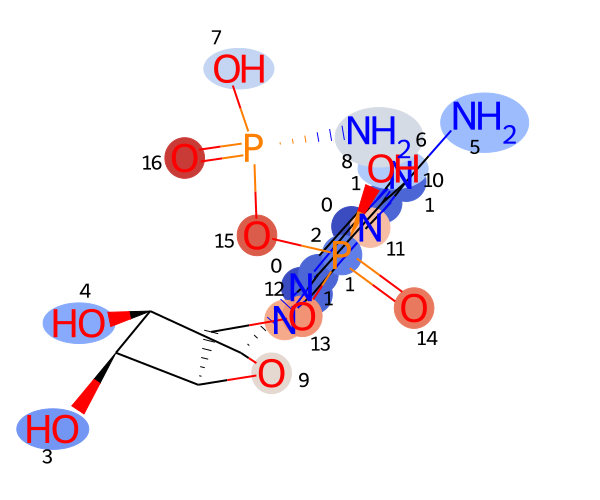

In [32]:
imgsize = (600, 500)
drawer = rdMolDraw2D.MolDraw2DSVG(*imgsize)
drawer.DrawMolecule(mol_, **highlights)
drawer.FinishDrawing()
svg = drawer.GetDrawingText()
display(SVG(svg.replace('svg:','')))

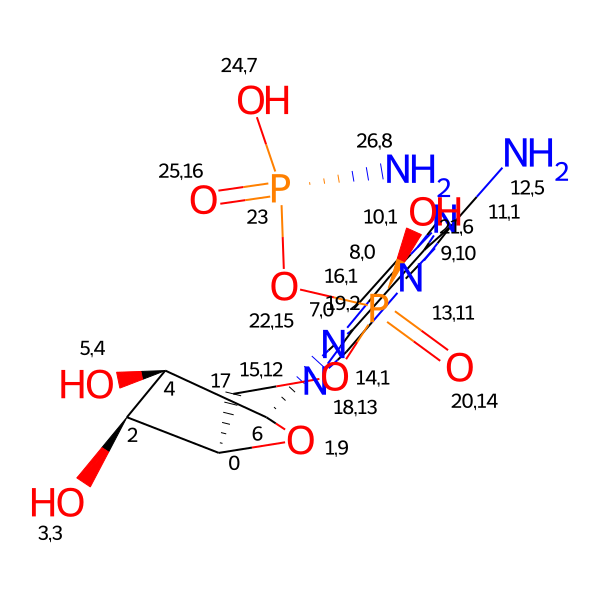

In [33]:
rdmol

In [34]:
for node in ligand.graph.nodes:
    print(node.positions.squeeze())
    print(node.types, node.index)
    atom_indices = list([node.atom_indices]) if type(node.atom_indices)==int else list(sorted(node.atom_indices))
    print(atom_indices)

[ 29.5173   -21.67718  -47.296944]
['Aromatic'] 0
[7, 8, 9, 10, 16]
[ 29.4393   -21.93435  -45.159046]
['Aromatic'] 1
[10, 11, 13, 14, 15, 16]
[ 29.383  -22.0077 -52.9629]
['Anion'] 2
[18, 19, 20, 21, 22]
[ 25.1852 -24.6464 -49.5021]
['HBond_donor', 'HBond_acceptor'] 3
[3]
[ 25.5847 -23.0403 -47.4165]
['HBond_donor', 'HBond_acceptor'] 4
[5]
[ 31.2386 -19.8936 -44.7143]
['HBond_donor', 'HBond_acceptor'] 5
[12]
[ 29.9771 -20.6927 -52.2993]
['HBond_donor', 'HBond_acceptor'] 6
[21]
[ 27.638  -19.1773 -53.8388]
['HBond_donor', 'HBond_acceptor'] 7
[24]
[ 29.6356 -20.1147 -55.4815]
['HBond_donor', 'HBond_acceptor'] 8
[26]
[ 28.315  -23.7995 -49.6337]
['HBond_acceptor'] 9
[1]
[ 30.2773 -20.7928 -47.577 ]
['HBond_acceptor'] 10
[9]
[ 29.8112 -21.592  -43.8875]
['HBond_acceptor'] 11
[13]
[ 28.5123 -22.9945 -45.2985]
['HBond_acceptor'] 12
[15]
[ 28.7813 -22.9349 -51.8187]
['HBond_acceptor'] 13
[18]
[ 30.4771 -22.8101 -53.8073]
['HBond_acceptor'] 14
[20]
[ 28.0928 -21.7077 -53.8894]
['HBond_accepto

In [36]:
# 1ywn (pp 2 and 4 should select one)
# selected = [2, 4, 12, 13, 14, 15, 22, 23, 25, 27]

# 1lhn
# selected = [17, 18]
# selected = [i for i in range(len(ligand.graph.nodes))]
# selected

# 4ara (the two oxygen connected with N are not identified by our extraction algorithm, but have interaction with protein)
# 4b82_B_rec_4ara_c56_lig_tt_min_0
# selected = [0, 1, 2, 5, 7, 8, 10]

# 4b84
# selected = [5, 7, 9, 10, 12, 13, 14]

# 3ey4
# selected = [1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14]

# 4k1l
# selected = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13]

# 3r58 (13 is an anion group including 14 and 16, two h bond acceptor/donor)
# selected = [5, 6, 7, 8, 10, 11, 13]
# selected = [5, 6, 7, 8, 10, 11, 14, 16]

# 5ni6
# selected = [5, 6, 9, 10, 11, 13, 14, 17, 18, 19, 20]

# 5ni2
# selected = [5, 6, 9, 10, 11, 13, 14, 17, 18, 19, 20]

# 5idn
# selected = [5, 11, 12, 15, 16]

# 4ijw
# selected = [3, 4, 5, 11, 12, 13, 14, 16, 17, 18, 19]

# 3hfg_A_rec_3hfg_17r_lig_tt_min_0
# selected = [0, 1, 2, 3, 4, 10, 11, 13, 14]

# 3ey4_C_rec_5pgu_8k4_lig_tt_min_0
# selected = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17]

# 5ni2_A_rec_5aen_dp8_lig_tt_min_0
# selected = [9, 10, 11, 12]

# 3fu5_A_rec_5ni6_dj3_lig_tt_min_0
# selected = [5, 6, 9, 10, 11, 13, 14, 17, 18, 19, 20]

# 4yyz_B_rec_2ilt_nn1_lig_tt_min_0
# 17 and 18 are two halogen groups, but in the interaction map, they should be hydrophobic groups
# selected = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13, 17, 18]

# 4bnn_A_rec_4bnm_tcu_lig_tt_min_0
# selected = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18]

# 4yvx_A_rec_1s2a_imn_lig_tt_min_0
# 20 is a halogen, but should be hydrophobic
# selected = [0, 1, 2, 3, 5, 13, 14, 16, 18, 20]

# 3czr_B_rec_4bb5_hd2_lig_tt_min_0
# selected = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 17, 18, 20, 21, 22]

# 3czr_A_rec_2ilt_nn1_lig_tt_min_0
# 17 and 18 are two halogen groups, but in the interaction map, they should be hydrophobic groups
# selected = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13, 17, 18]

# 4b84_A_rec_4btl_5gz_lig_tt_min_0
# the most important NO2 group is not identified
# selected = [4, 9, 10, 12, 13]

# 3fue_A_rec_3ftv_11x_lig_tt_min_0
# selected = [0, 1, 2, 3, 4, 5, 6, 7, 10, 11]

# 4bnk_B_rec_4d44_ja3_lig_tt_min_0
# selected = [0, 1, 2, 3, 4, 5, 6, 9, 10]

# 3qqp_B_rec_4k1l_sff_lig_tt_min_0
# selected = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13]

# 4wdu_A_rec_3r94_flr_lig_tt_min_0
# 16 and 17 are h bond acceptors but included in 15 (anion)
# selected = [0, 1, 2, 3, 4, 12, 15, 14]

# 4alj_A_rec_4bnf_pv4_lig_tt_docked_0
# selected = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 14]

# 1ejj_A_rec_1o99_2pg_lig_tt_docked_0
# 0 and 1 are anion groups that include many h bond donors/acceptors
# selected = [0, 1, 3]
# selected = [2, 3, 4, 5, 6, 7, 8]

# 4h96_B_rec_4h95_06u_lig_tt_min_0
# selected = [3, 4, 6, 7, 8, 9, 10, 11, 17, 19, 20, 21, 22]

# 2oa6_D_rec_4kvi_1sv_lig_tt_min_0
# selected = [0, 1, 2, 3, 4, 5, 6, 7, 9]

# 4hx5_B_rec_3bzu_a21_lig_tt_min_0
# 5pgy_D_rec_3bzu_a21_lig_tt_min_0
# 5pgv_A_rec_3bzu_a21_lig_tt_min_0
# selected = [0, 1, 7, 8, 9, 10]

# 4kux_B_rec_4kvw_jf4_lig_tt_min_0
# TODO: should be 10 rather than 9
# selected = [5, 7, 8, 9, 11]

# 4bnk_B_rec_4bnl_w1g_lig_tt_min_0
# selected = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 14]

# 4pm0_A_rec_4y2b_epk_lig_tt_min_0
# selected = [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13]

# 4ms6_A_rec_3fuh_5h1_lig_tt_min_0
# selected = [0, 1, 2, 3, 5, 6]

# 5ivg_B_rec_4kvy_jf1_lig_tt_docked_9: only 4 hydro...
# selected = [1, 3, 9, 10]

# 3r8h_A_rec_3r8h_zom_lig_tt_min_0: has both aromatic and h bond
# selected = [2, 10, 11]

# 1aoe_A_rec_3qlr_qlr_lig_tt_docked_4
# selected = [2, 5, 6, 7, 8, 9, 13, 14, 15]

# 2ilt_A_rec_3ey4_352_lig_tt_min_0
# selected = [0, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13]

# 2g1q_A_rec_1x88_nat_lig_tt_min_0: hydro + h bond
# selected = [1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13]

# 5imp_B_rec_4kwd_jf2_lig_tt_min_0
# selected = [1, 3, 5, 10]

# 4d45_A_rec_4ali_tcl_lig_tt_min_0
# selected = [0, 1, 2, 3, 4, 5, 8]

# 5ivg_B_rec_4kvw_jf4_lig_tt_min_0
# selected = [5, 7, 8, 10]

# 2rbe_C_rec_3byz_h11_lig_tt_min_0
# selected = [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13]

# 2whr_A_rec_3zlv_hi6_lig_tt_min_0: few hydro. three h bond
# selected = [3, 4, 5]

# 4hmn_A_rec_3ufy_npx_lig_tt_min_0: hydro + aromatic + h bond
# selected = [10, 11, 12, 14, 16]

# 4h7c_A_rec_3r6i_jms_lig_tt_min_0
# selected = [1, 4, 5, 6, 7, 8, 9, 12]

# 1pha_A_rec_1phg_myt_lig_tt_min_0
# 1phd_A_rec_1phg_myt_lig_tt_min_0
# 1phg_A_rec_1phg_myt_lig_tt_min_0
# 1p2y_A_rec_1phg_myt_lig_tt_min_0
# 9 and 11 conflict
# selected = [1, 6, 7, 8, 9, 11]
# selected = [1, 6, 7, 8, 9]
# selected = [1, 6, 7, 8, 11]

# 1phg_A_rec_1phe_piy_lig_tt_min_0: wrong!! forgot 0. 6 and 8,9 conflict
# selected = [0, 1, 2, 3, 4, 5, 6]
# selected = [6, 7]

# 1p2y_A_rec_1phe_piy_lig_tt_min_0
# selected = [0, 1, 2, 3, 4, 5, 6]

# 5lgq_D_rec_4ikp_4ik_lig_tt_docked_1
# selected = [0, 1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 14, 15, 17]

# 1c8j_A_rec_1p2y_nct_lig_tt_min_0
# selected = [4, 5]

# 1l5l_A_rec_1l4l_xyd_lig_tt_min_0
# 4kqg_A_rec_1l4l_xyd_lig_tt_min_0
# selected = [7, 8]

# 1jhy_A_rec_1l4f_150_lig_tt_min_0
# selected = [4, 6, 7, 8]

# 4ws4_A_rec_4wpl_ura_lig_tt_min_0
# selected = [1, 4, 5]

# 4l0s_A_rec_5al5_jl9_lig_tt_min_0
# selected = [1, 2, 8, 13]

# 2pg2_A_rec_2wog_zzd_lig_tt_min_0
# selected = [18, 19, 20, 22, 23, 24]

# 4yur_A_rec_3cok_anp_lig_tt_min_0
selected = [1, 3, 4, 5, 6, 10, 14, 16]

In [37]:
selected_pp = [ligand.graph.nodes[i] for i in selected]
selected_pp

[LigandNode(1)['Aromatic'],
 LigandNode(3)['HBond_donor', 'HBond_acceptor'],
 LigandNode(4)['HBond_donor', 'HBond_acceptor'],
 LigandNode(5)['HBond_donor', 'HBond_acceptor'],
 LigandNode(6)['HBond_donor', 'HBond_acceptor'],
 LigandNode(10)['HBond_acceptor'],
 LigandNode(14)['HBond_acceptor'],
 LigandNode(16)['HBond_acceptor']]

In [38]:
num_feat_class = max(len(PP_TYPE_MAPPING.keys()), len(MAP_ATOM_TYPE_AROMATIC_TO_INDEX.keys()))
pp_atom_indices, pp_positions, pp_types, pp_index = extract_selected_pp(selected_pp, num_feat_class)

In [46]:
aromatic = False
data = process_one(aromatic, rdmol, selected_pp, filename = ligand_filename.split('.')[0])

In [47]:
data

Data(x=[54, 8], pos=[54, 3], target_x=[54, 8], target_pos=[54, 3], Gt_mask=[54], ligand_name='4yur_A_rec_3cok_anp_lig_tt_min_0')

In [48]:
save_path = '../evaluation/structure_based'
# foldername = ligand_filename[ligand_filename.rfind('rec')+4:ligand_filename.rfind('rec')+8]
foldername = ligand_filename.split('.')[0]
save_fn = ligand_filename.split('.')[0] + '_aromatic.pt' if aromatic else ligand_filename.split('.')[0] + '.pt'

In [49]:
# data.target_x

In [50]:
os.makedirs(os.path.join(save_path, foldername), exist_ok=True)
torch.save(data, os.path.join(save_path, foldername, save_fn))

In [44]:
pp_info = {
    'pp_types': pp_types, 
    'pp_positions': pp_positions
}

pp_info

{'pp_types': tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]]),
 'pp_positions': tensor([[ 29.4393, -21.9343, -45.1590],
         [ 25.1852, -24.6464, -49.5021],
         [ 25.5847, -23.0403, -47.4165],
         [ 31.2386, -19.8936, -44.7143],
         [ 29.9771, -20.6927, -52.2993],
         [ 30.2773, -20.7928, -47.5770],
         [ 30.4771, -22.8101, -53.8073],
         [ 26.9954, -20.5325, -55.9900]])}

In [45]:
with open(os.path.join(save_path, foldername, 'pp_info.pkl'), 'wb') as f:
    pickle.dump(pp_info, f)